## PREDICTING WIND ENERGY PRODUCTION

The objetive of this project is to develop a machine learing model for estimating how much energy is going to be produced at the Sotavento experimental wind farm. To do it, we will use meteorological variables forecasted by ECMWF (http://www.ecmwf.int/) as input attributes. We have 22 variables, but, it is common practice to use the value of those variables, not just at the location of interest (Sotavento in this case), but at points in a grid around Sotavento. A 5x5 grid will be used in this case. Important to have in mind that the values at point 13 are the ones exactly Sotavento.Therefore, finally we have 550 variables (plus other 5 measuring energy, year, month, day and hour). The 22 variables are described as follows: 

- t2m: 2 metre temperature
- u10: 10 metre U wind component
- v10: 10 metre V wind component
- u100: 100 metre U wind component
- v100: 100 metre V wind component
- cape: Convective available potential energy
- flsr: Forecast logarithm of surface roughness for heat
- fsr: Forecast surface roughness
- iews: Instantaneous eastward turbulent surface stress
- inss: Instantaneous northward turbulent surface
- lai_hv: Leaf area index, high vegetation
- lai_lv: Leaf area index, low vegetation
- u10n: Neutral wind at 10 m u-component
- v10n: Neutral wind at 10 m v-component
- stl1: Soil temperature level 1
- stl2: Soil temperature level 2
- stl3: Soil temperature level 3
- stl4: Soil temperature level 4
- sp: Surface pressure
- p54.162: Vertical integral of temperature
- p59.162: Vertical integral of divergence of kinetic energy
- p55.162: Vertical integral of water vapour


First, we load the dataset.

In [1]:
import pandas as pd
import numpy as np

In [1]:
wind_ava = pd.read_csv("C:\\Users\\victoria\\Escritorio\\MASTER\\Big Data Intelligence\\Assignment_1\\Big_Data_Intelligence\\wind_available.csv.gzip", compression="gzip")

In [2]:
#pongo aqui abajo mi path 
wind_ava = pd.read_csv("/Users/pameladiaz/Documents/GitHub/Big_Data_Intelligence/wind_available.csv.gzip", compression="gzip")

## 1. Exploratory Data Analysis

It is important before starting any machine learning project to observe and understand the data we have. Therefore, during this section we will be exploring how many features and how many instances the dataset has, which variables are categorical / numerical, which features have missing values and how many, whether there are constant columns, some statistics, and whether it is a regression or classification problem. 

Finally, we will plot some of the variables in terms of the target for trying to find some relations.

### 1.1. Number of features

As previosly explained, the dataset contains 555 variables and 4747 instances.

In [3]:
pd.set_option('display.max_rows', 10)
wind_ava

,energy,year,month,day,hour,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,402.71,2005,1,2,18,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,...,-4.683596,NaN,-4.407196,NaN,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,696.80,2005,1,3,0,NaN,NaN,2.521184e+06,2.513088e+06,NaN,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,NaN
2,1591.15,2005,1,3,6,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,NaN,...,-1.454105,NaN,-1.138290,NaN,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,1338.62,2005,1,3,12,NaN,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,562.50,2005,1,3,18,2.529543e+06,NaN,2.513702e+06,2.505782e+06,2.497861e+06,...,1.939031,NaN,NaN,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,1280.13,2009,12,30,6,NaN,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,NaN,9.068059,8.956800
4744,855.00,2009,12,30,12,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,...,7.345796,NaN,7.655624,NaN,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
4745,117.06,2009,12,30,18,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727
4746,516.96,2009,12,31,12,2.393873e+06,2.386499e+06,2.379125e+06,2.371752e+06,2.364378e+06,...,1.988424,NaN,NaN,NaN,2.529749,1.960983,2.094194,2.226906,2.360117,2.492829


### 1.2. Variable type

All the variables we are dealing with are numerical, most of them continuous and only the ones specifiying the time when the measure was taken (year, month, day and hour) are of type integer. This leaves us with a regression problem, as the target variable 'energy' is a continuous numerical variable.

In [4]:
pd.set_option('display.max_rows', None)
wind_ava.dtypes

energy        float64
year            int64
month           int64
day             int64
hour            int64
p54.162.1     float64
p54.162.2     float64
p54.162.3     float64
p54.162.4     float64
p54.162.5     float64
p54.162.6     float64
p54.162.7     float64
p54.162.8     float64
p54.162.9     float64
p54.162.10    float64
p54.162.11    float64
p54.162.12    float64
p54.162.13    float64
p54.162.14    float64
p54.162.15    float64
p54.162.16    float64
p54.162.17    float64
p54.162.18    float64
p54.162.19    float64
p54.162.20    float64
p54.162.21    float64
p54.162.22    float64
p54.162.23    float64
p54.162.24    float64
p54.162.25    float64
p55.162.1     float64
p55.162.2     float64
p55.162.3     float64
p55.162.4     float64
p55.162.5     float64
p55.162.6     float64
p55.162.7     float64
p55.162.8     float64
p55.162.9     float64
p55.162.10    float64
p55.162.11    float64
p55.162.12    float64
p55.162.13    float64
p55.162.14    float64
p55.162.15    float64
p55.162.16

### 1.3. Missing values

If any of the variables has many missing values (more than 80%) we should remove it. After checking it, we are sure none of them  has more than 80% nulls, the maximum is 20.3 % for the variable lai_hv.13 (Leaf area index, high vegetation, section 13, Sotavento). It is difficult to determine the reason most of the variables has nulls, as we are not experts on the field. We will try to solve this later on the preprocessing with imputation methods.


In [4]:
null_percentage = wind_ava.isnull().sum()/ len(wind_ava) * 100
print(null_percentage[null_percentage > 80])
print(max(null_percentage))
null_percentage

Series([], dtype: float64)
20.30328559393429


energy         0.000000
year           0.000000
month          0.000000
day            0.000000
hour           0.000000
p54.162.1      7.834878
p54.162.2      9.709351
p54.162.3      5.539174
p54.162.4      6.613311
p54.162.5     10.299073
p54.162.6     17.796967
p54.162.7     18.239259
p54.162.8     11.962932
p54.162.9      9.519798
p54.162.10     5.728728
p54.162.11    17.144061
p54.162.12     9.077506
p54.162.13    18.302443
p54.162.14     5.560236
p54.162.15     8.066554
p54.162.16     4.949452
p54.162.17    18.281382
p54.162.18    16.364785
p54.162.19    18.639427
p54.162.20    10.046335
p54.162.21    17.965459
p54.162.22    16.596462
p54.162.23    11.604886
p54.162.24    14.679865
p54.162.25    12.594777
p55.162.1      6.781803
p55.162.2      6.634372
p55.162.3     15.522325
p55.162.4      7.392586
p55.162.5      9.898905
p55.162.6      6.276327
p55.162.7      9.814659
p55.162.8     10.299073
p55.162.9     17.122999
p55.162.10    10.741365
p55.162.11     5.918281
p55.162.12    10

### 1.4. Statistics

As all of our variables are numeric, we can perform a statistical analysis by giving some information about the mean, standard deviation, quantiles etc.

In [5]:
wind_ava.describe().T


,count,mean,std,min,25%,50%,75%,max
energy,4748.0,6.931262e+02,6.655316e+02,1.000000e-02,1.441700e+02,4.653050e+02,1.089375e+03,2.792550e+03
year,4748.0,2.006628e+03,1.414856e+00,2.005000e+03,2.005000e+03,2.006000e+03,2.007000e+03,2.009000e+03
month,4748.0,6.628054e+00,3.475914e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
day,4748.0,1.565249e+01,8.844734e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
hour,4748.0,9.123842e+00,6.755085e+00,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,1.800000e+01
p54.162.1,4376.0,2.512664e+06,4.498680e+04,2.380562e+06,2.481905e+06,2.513508e+06,2.548502e+06,2.604194e+06
p54.162.2,4287.0,2.504671e+06,4.519397e+04,2.373125e+06,2.473722e+06,2.505370e+06,2.540545e+06,2.596310e+06
p54.162.3,4485.0,2.497395e+06,4.504295e+04,2.365683e+06,2.466373e+06,2.498471e+06,2.533515e+06,2.588421e+06
p54.162.4,4434.0,2.489648e+06,4.483586e+04,2.358246e+06,2.458621e+06,2.490711e+06,2.525281e+06,2.580532e+06
p54.162.5,4259.0,2.481708e+06,4.460474e+04,2.350809e+06,2.451135e+06,2.482535e+06,2.517041e+06,2.572648e+06


### 1.5. Constant columns

Similarly with the null values, if any column has constant values, this gives no information to the final model, so it should be removed. Taking into account that some variables have null values, we should look if the number of unique values is less or equal to 2 (the constant value and Nan). As is not the case, we don't have any column with constant values.

In [6]:
print(wind_ava.nunique() <= 2)
#wind_ava.nunique()

energy        False
year          False
month         False
day           False
hour          False
p54.162.1     False
p54.162.2     False
p54.162.3     False
p54.162.4     False
p54.162.5     False
p54.162.6     False
p54.162.7     False
p54.162.8     False
p54.162.9     False
p54.162.10    False
p54.162.11    False
p54.162.12    False
p54.162.13    False
p54.162.14    False
p54.162.15    False
p54.162.16    False
p54.162.17    False
p54.162.18    False
p54.162.19    False
p54.162.20    False
p54.162.21    False
p54.162.22    False
p54.162.23    False
p54.162.24    False
p54.162.25    False
p55.162.1     False
p55.162.2     False
p55.162.3     False
p55.162.4     False
p55.162.5     False
p55.162.6     False
p55.162.7     False
p55.162.8     False
p55.162.9     False
p55.162.10    False
p55.162.11    False
p55.162.12    False
p55.162.13    False
p55.162.14    False
p55.162.15    False
p55.162.16    False
p55.162.17    False
p55.162.18    False
p55.162.19    False
p55.162.20    False


### 1.6. Visualization

Let's observe first how the objective variable looks. It follows an exponential distribution, as most of the values are around the highest energy production.

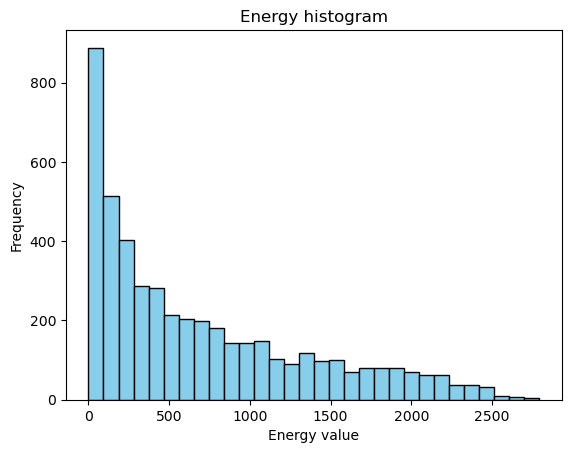

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 10)

plt.hist(wind_ava['energy'],  bins=30, color='skyblue', edgecolor='black')
plt.title(f'Energy histogram')
plt.xlabel('Energy value')
plt.ylabel('Frequency')

# Muestra el histograma
plt.show()

We could also observe the mean enery production per year. As observed,  most of the years have similar energy production.

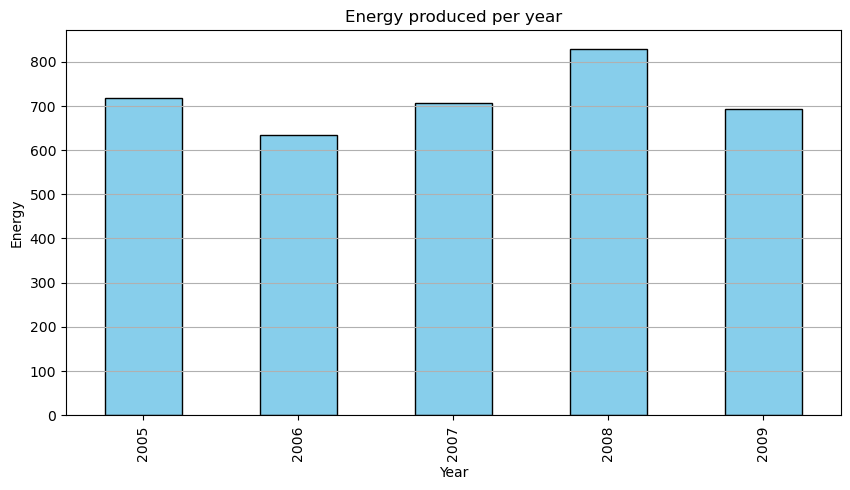

In [8]:
# Calcular el promedio de energía por año
mean_energy = wind_ava.groupby('year')['energy'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico según tus preferencias
mean_energy.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico (opcional)
plt.title('Energy produced per year')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.grid(axis='y')

# Mostrar el gráfico de barras
plt.show()

Similarly, we could observe the mean energy production per month. This plot give us more valuable information, becuase, as it could be expected, on the months of worst weather and more wind, the energy production is highly increased.

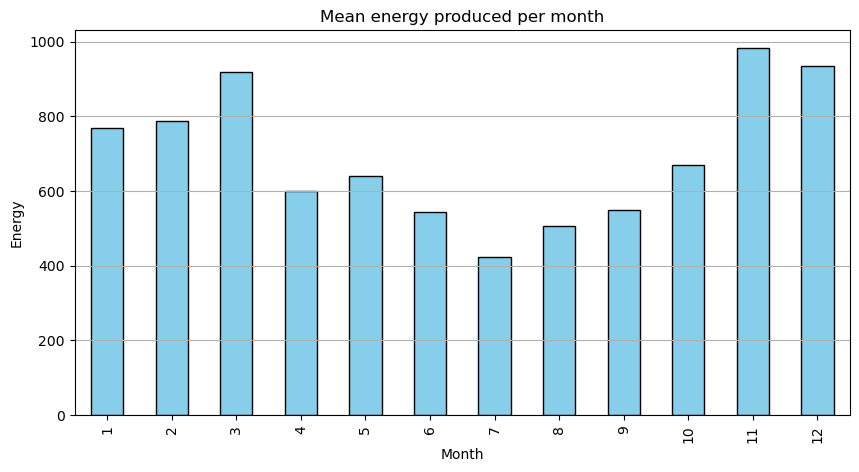

In [9]:
# Calcular el promedio de energía por año
mean_energy = wind_ava.groupby('month')['energy'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico según tus preferencias
mean_energy.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico (opcional)
plt.title('Mean energy produced per month')
plt.xlabel('Month')
plt.ylabel('Energy')
plt.grid(axis='y')

# Mostrar el gráfico de barras
plt.show()

Althought we have many variables, it is understandable that the variables u100 (100 metre U wind component) and v100 (100 metre V wind component) give us the most valuable information. However, the modullus is more valuable, as measures the wind speed at 100 meters high. This plot could be observed later at section 3.4. Here we tried a 3D plot with the vector components against the energy.

In [10]:
## CHAT GPT
# Enable interactive plots in Jupyter Notebook
'''
%matplotlib notebook

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtain the columns defining the u and v components of the wind 
v_wind_columns = wind_ava.columns[wind_ava.columns.str.startswith('v100.')]
u_wind_columns = wind_ava.columns[wind_ava.columns.str.startswith('u100.')]

 
ax.scatter(wind_ava['energy'], wind_ava[v_wind_columns].mean(axis=1),wind_ava[v_wind_columns].mean(axis=1),  c='skyblue', marker='o')
ax.set_xlabel('Energy')
ax.set_ylabel('Mean v wind component')
ax.set_zlabel('Mean u wind component')
ax.set_title('U and V wind components vs Energy')
plt.show()
'''

"\n%matplotlib notebook\n\nfig = plt.figure(figsize=(10, 8))\nax = fig.add_subplot(111, projection='3d')\n\n# Obtain the columns defining the u and v components of the wind \nv_wind_columns = wind_ava.columns[wind_ava.columns.str.startswith('v100.')]\nu_wind_columns = wind_ava.columns[wind_ava.columns.str.startswith('u100.')]\n\n \nax.scatter(wind_ava['energy'], wind_ava[v_wind_columns].mean(axis=1),wind_ava[v_wind_columns].mean(axis=1),  c='skyblue', marker='o')\nax.set_xlabel('Energy')\nax.set_ylabel('Mean v wind component')\nax.set_zlabel('Mean u wind component')\nax.set_title('U and V wind components vs Energy')\nplt.show()\n"

## 2. Inner, outer evaluation and metric

After exploring our dataset, next step is to choose the strategy to follow. Among the inner and outer evaluation, as we are dealing with a big amount of data, we have decided to perform a holdout outer evaluation and 3 fold cross-validation inner evaluation. If we choose a cross validation also for the outer evaluation it would be too costly for the code to work. However, if we perform hodlout in both evaluations we may end up with a model not as optimize as possible. 

Having this in mind, it is also important to take into account the nature of the data. We have a non independent and identically distributed (i.i.d) dataset, as the measurements are taken along a timeline. Then, as we are dealing with a time series data, we decided to split for the outer evaluation (holdout) the data from year 2009 as test and the rest as training. Later, among the training data, for the cross validation we decided a 3 fold having in mind three 'sets' of years: 2005, 2006 and 2007/2008. As can be observed in the following plot, year 2008 does not have enought information to be taken into account as a single fold, therefore, the solution we found was to 'join' it with the previous year data.

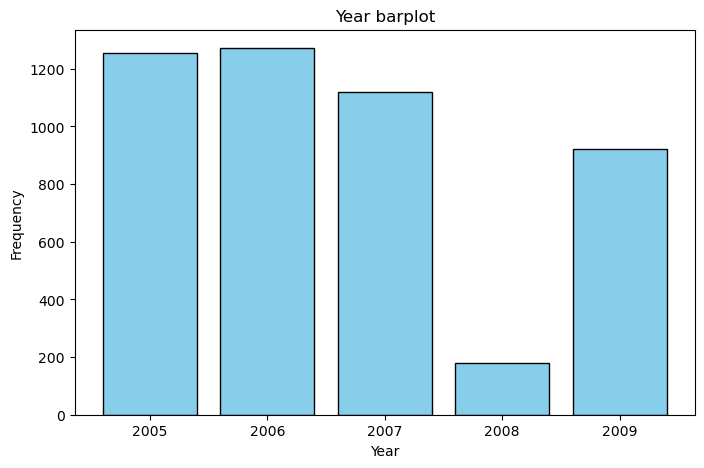

In [11]:
plt.figure(figsize=(8, 5))

plt.bar(wind_ava['year'].value_counts().index, wind_ava['year'].value_counts().values, color='skyblue', edgecolor='black')
plt.title(f'Year barplot')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Muestra el histograma
plt.show()

About the metrics or performance measures for regression problems we have:
- Mean Squared Error
- Root Mean Squared Error
- Mean Absolute Error
- Median Absolute Error

Which one is better for a machine learning regression problem? CHAT GPT:
The choice of which metric to use for evaluating a regression model depends on the specific characteristics of your problem and the goals of your analysis. Here's a brief overview of the commonly used regression metrics:

- Mean Squared Error (MSE):

    - Pros: Penalizes large errors more heavily, which can be useful when large errors are particularly undesirable.
    - Cons: Sensitive to outliers due to the squaring of errors.
- Root Mean Squared Error (RMSE):

    - Pros: Similar to MSE but in the same scale as the target variable.
    - Cons: Still sensitive to outliers.
- Mean Absolute Error (MAE):

    - Pros: Provides a more straightforward interpretation as it is not sensitive to outliers in the same way MSE and RMSE are.
    - Cons: May not penalize large errors enough in some cases.
- Median Absolute Error (MedAE):

    - Pros: Less sensitive to outliers compared to MAE, as it is computed on the absolute values of residuals.
    - Cons: Ignores the magnitude of errors and focuses on their order.
The "best" metric depends on your specific problem and the characteristics of your data. Here are some considerations:

Mean Squared Error (MSE) or Root Mean Squared Error (RMSE): These are often preferred when large errors should be penalized more heavily, and the distribution of errors is approximately normal. However, if your data contains outliers, MSE and RMSE can be significantly affected.

Mean Absolute Error (MAE) or Median Absolute Error (MedAE): These are more robust to outliers. If your dataset has a skewed distribution or contains outliers, MAE or MedAE might be more appropriate.

Median Absolute Error (MedAE): Particularly useful when the distribution of errors is skewed and you want a metric less influenced by extreme values.

In practice, it's common to try multiple metrics and consider the overall performance of the model. It's also helpful to consider the specific context of your problem and the implications of different types of errors in your application.

### 2.1. Holdout split

In [12]:
from sklearn.model_selection import train_test_split
##chat gpt
# Filtra las observaciones para obtener el conjunto de entrenamiento (datos anteriores a 2009) y el conjunto de prueba (datos de 2009 y posteriores)
train_data = wind_ava[wind_ava['year'] < 2009]
test_data = wind_ava[wind_ava['year'] >= 2009]

# Divide los conjuntos de entrenamiento y prueba en características (X) y etiquetas (y)
X_train = train_data.drop('energy', axis=1)  # Ajusta 'target_column' al nombre de la columna que contiene la variable objetivo
y_train = train_data['energy']

X_test = test_data.drop('energy', axis=1)
y_test = test_data['energy']

### 2.2. 3 fold CV

de esto no estoy segura si va así porque se lo he pedido a chatgpt y ha metido ya dentro un modelo entonces creo que esto habría que hacerlo cada vez que hagamos cualquier HPO(en el preprocesado para cada apartado y luego en el modelado igual). Y tal vez haya que hacerlo como nos dijo el profe con las pipelines y tal (el próximo día lo miro con más calma)

PERO BUENO HE APRENDIDO QUE EXISTE LO DEL TIMESERIESSPLIT Y CREO QUE LO PODREMOS USAR.

In [13]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor  # Replace with your desired model

#chat gpt
# Define the number of splits for the cross-validation
n_splits = 3

# Create a TimeSeriesSplit object
time_series_split = TimeSeriesSplit(n_splits=n_splits)

# Split the training data using time series cross-validation
for train_index, val_index in time_series_split.split(X_train):
    X_train_cv, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train and evaluate your model on each fold
    model = RandomForestRegressor()  # Replace with your desired model
    model.fit(X_train_cv, y_train_cv)
    score = model.score(X_val, y_val)

    print(f'Validation Score: {score}')

# Train your final model on the entire training set
final_model = RandomForestRegressor()  # Replace with your desired model
final_model.fit(X_train, y_train)

# Evaluate your final model on the test set
test_score = final_model.score(X_test, y_test)
print(f'Test Set Score: {test_score}')


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 3. Preprocessing 

### 3.1. Imputation


### 3.2. Feature selection

Segun el profe mejor hacer imputacion primero si es multivariate creo que al ser tantas variables es mejor primero a lo mejor hacer una primera seleccion para quitarnos algunas viendo la correlacion, porque por ejemplo si hacemos MICE son muchisimas iteraciones para hacer el modelo e ir rellenando columna por columna
los resultados son un poco raros porque sale que mes casi no tiene correlacion, no se si eso es normal. 
Por otra parte, en pandas la funcion de correlacion directamente no hace la correlacion si hay un NAN.
"The corr() method in pandas automatically handles missing values (NaN) when calculating correlations. When computing the correlation matrix, pandas will exclude any pairs of observations that have missing values for either of the two variables being considered."
Yo me cargaba todas las p55, cape y stl4 sinceramente.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

energy        1.000000
p59.162.7     0.461137
p59.162.11    0.458267
p59.162.2     0.453505
p59.162.16    0.453181
p59.162.22    0.451003
p59.162.18    0.449278
p59.162.3     0.448764
p59.162.4     0.448154
p59.162.8     0.447234
p59.162.6     0.447132
p59.162.20    0.446759
p59.162.1     0.446686
p59.162.5     0.446392
p59.162.9     0.445314
p59.162.13    0.445099
p59.162.17    0.444240
p59.162.12    0.443554
p59.162.19    0.441415
p59.162.24    0.440715
p59.162.21    0.440356
p59.162.23    0.439713
p59.162.10    0.439203
p59.162.15    0.435009
p59.162.25    0.431204
p59.162.14    0.430997
inss.10       0.369673
inss.20       0.366510
inss.15       0.365210
inss.25       0.363362
inss.24       0.358361
iews.10       0.356199
inss.18       0.354006
inss.5        0.353766
inss.19       0.352077
inss.23       0.351555
inss.11       0.347296
iews.9        0.346635
inss.4        0.345877
iews.25       0.345793
inss.14       0.344895
inss.13       0.343305
inss.8        0.342608
inss.3     

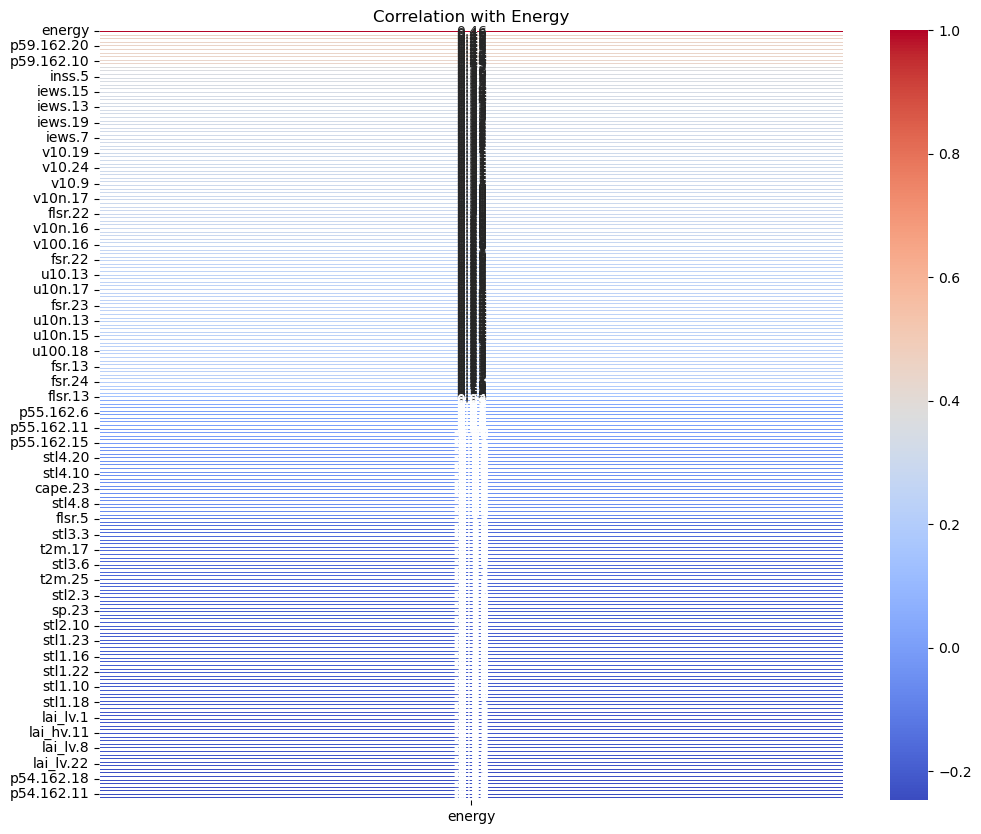

In [9]:
# Extract the correlation with the Response Variable 
correlation_with_energy = wind_ava.corr()['energy'].sort_values(ascending=False)
print(correlation_with_energy)

# Heatmap Visualization for the correlation with 'energy'
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(correlation_with_energy), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation with Energy')
plt.show()

### 3.3. Scaling

### 3.4. Feature transformation

ESTO LO PUSE AQUÍ PERO NO SÉ SI DEBERÍA IR AL PRINCIPIO O MEJOR AQUI Y SI APLICARLO A TODO (AHORA ESTA ASI) O SOLO AL TRAINING

In [14]:
## CHAT GPT
# Assuming wind_ava is your DataFrame
v_wind_columns = wind_ava.columns[wind_ava.columns.str.startswith('v100.')]
u_wind_columns = wind_ava.columns[wind_ava.columns.str.startswith('u100.')]

# Iterate through pairs of u and v columns
for u_col, v_col in zip(u_wind_columns, v_wind_columns):
    # Extract u and v components
    u_component = wind_ava[u_col]
    v_component = wind_ava[v_col]

    # Calculate wind speed
    wind_speed_col = f"wind_speed{u_col.split('.')[1]}"
    wind_ava[wind_speed_col] = np.sqrt(u_component**2 + v_component**2)

# Display the modified DataFrame with new wind speed columns
wind_ava.head()

,energy,year,month,day,hour,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,...,wind_speed16,wind_speed17,wind_speed18,wind_speed19,wind_speed20,wind_speed21,wind_speed22,wind_speed23,wind_speed24,wind_speed25
0,402.71,2005,1,2,18,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,...,5.134636,NaN,NaN,NaN,4.393808,5.137268,4.948249,4.760744,4.574870,4.389944
1,696.80,2005,1,3,0,NaN,NaN,2.521184e+06,2.513088e+06,NaN,...,5.298553,NaN,4.869726,4.655077,4.440835,5.300003,5.085998,4.872320,4.658335,NaN
2,1591.15,2005,1,3,6,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,NaN,...,5.587899,NaN,NaN,NaN,NaN,5.529130,5.324473,5.122190,4.922326,NaN
3,1338.62,2005,1,3,12,NaN,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,...,4.779456,4.715311,4.655777,4.600019,4.549180,4.698198,4.634036,4.573135,4.516475,4.463542
4,562.50,2005,1,3,18,2.529543e+06,NaN,2.513702e+06,2.505782e+06,2.497861e+06,...,3.941046,NaN,NaN,3.917355,NaN,NaN,3.851946,3.843097,3.836565,3.832704


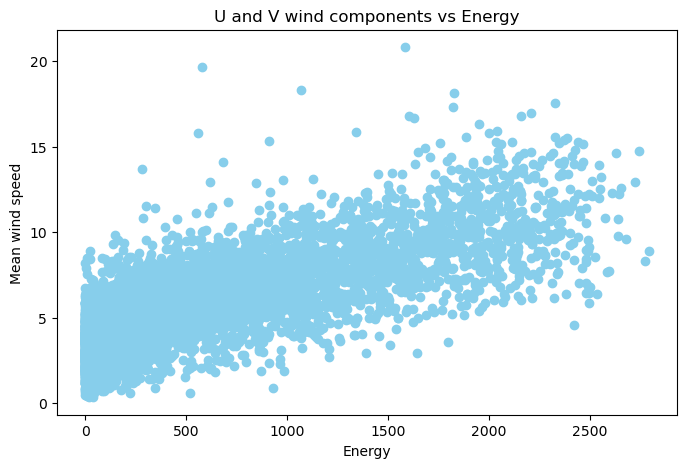

In [15]:
plt.figure(figsize=(8, 5))

# Obtain the columns defining the u and v components of the wind 
wind_speed_columns = wind_ava.columns[wind_ava.columns.str.startswith('wind_speed')]

 
plt.scatter(wind_ava['energy'], wind_ava[wind_speed_columns].mean(axis=1), c='skyblue')
plt.xlabel('Energy')
plt.ylabel('Mean wind speed')
plt.title('U and V wind components vs Energy')
plt.show()